In [1]:
import numpy as np

In [2]:
#Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    return x*(1-x)

In [4]:
#define the XOR dataset
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
outputs = np.array([[0],[1],[1],[0]])

In [5]:
#srt random seed for reproducibility
np.random.seed(100)
# initialize weights randomly with mean 0
input_size = 2
hidden_size = 4
output_size = 1

In [6]:
weights_input_hidden = np.random.uniform(-1,1,(input_size,hidden_size))
weights_hidden_output = np.random.uniform(-1,1,(hidden_size,output_size))

In [7]:
#hyperparameters
learning_rate = 0.1
epochs = 10000

#Training loop
for epoch in range(epochs):
    #Forward propogation
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)
    
    #calculate error
    
    error = outputs - predicted_output
    
    #Backpropogation
    d_predicted_output = error*sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    #Update Weights
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer)*learning_rate
    
    #Test the trained network
test_input = np.array([[0,0],[0,1],[1,0],[1,1]])
test_output = sigmoid(np.dot(sigmoid(np.dot(test_input,weights_input_hidden)),weights_hidden_output))
print("Predicted XOR output:")
print(test_output)

Predicted XOR output:
[[0.09198199]
 [0.91346943]
 [0.92084067]
 [0.08962728]]


# Reinforcement Learning

In [8]:
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

C:\Users\USER\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


# PCA 

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
np.random.seed(0)
n_samples = 100
n_features = 2
X = np.random.rand(n_samples, n_features)

<function matplotlib.pyplot.show(close=None, block=None)>

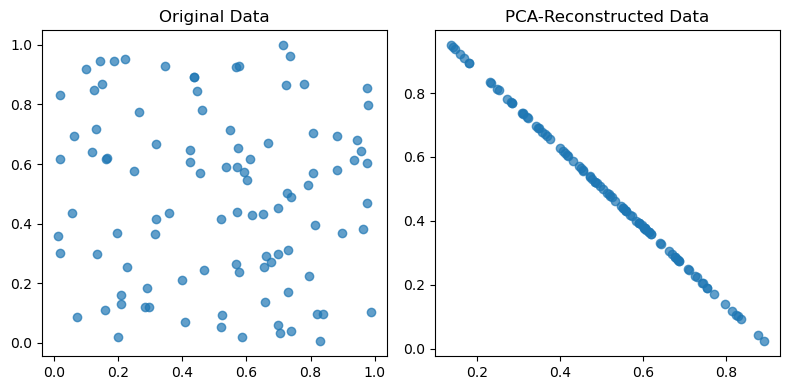

In [12]:
#Initialize PCA with the desired number of components
n_components = 1
pca = PCA(n_components = n_components)

#Fit PCA on the data and transform it
X_pca = pca.fit_transform(X)

#Inverse transform to get the projected data back into the original space
X_original = pca.inverse_transform(X_pca)

#Plot the original data and the PCA-reconstructed data
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_original[:,0],X_original[:,1],alpha = 0.7)
plt.title('PCA-Reconstructed Data')

plt.tight_layout()
plt.show